In [ ]:
#Downloading the dataset from API and saving into the home directory
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /home/horse-human.zip

--2021-01-24 15:53:05--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 173.194.213.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/home/horse-human.zip’

/home/horse-human.z 100%[===================>] 142.65M   121MB/s    in 1.2s    

2021-01-24 15:53:06 (121 MB/s) - ‘/home/horse-human.zip’ saved [149574867/149574867]



In [ ]:
import os
import zipfile

horse_human_zip_path = '/home/horse-human.zip'
#reading the zip file
zip_ref = zipfile.ZipFile(horse_human_zip_path, 'r')
#extracting the zip file to /home/horse_human
zip_ref.extractall('/home/horse_human')
zip_ref.close()

In [ ]:
train_horse_dir = os.path.join('/home/horse_human/horses')   #points to the horses dir
train_human_dir = os.path.join('/home/horse_human/humans')   #points to the humans dir

In [ ]:
train_horse_names = os.listdir(train_horse_dir)             #a list containing all the horse names
print(train_horse_names[:5])
train_human_names = os.listdir(train_human_dir)             #a list containing all the human names
print(train_human_names[:5])

['horse09-4.png', 'horse43-9.png', 'horse02-1.png', 'horse42-6.png', 'horse26-9.png']
['human11-27.png', 'human09-24.png', 'human15-23.png', 'human15-27.png', 'human13-15.png']


In [ ]:
print("Total no. of Horse Images : ", len(train_horse_names))
print("Total no. of Human Images : ", len(train_human_names))

Total no. of Horse Images :  500
Total no. of Human Images :  527


In [ ]:
import matplotlib.pyplot as plt

image_index_horse = 39
image_index_human = 65

image_path_horse = os.path.join(train_horse_dir, train_horse_names[image_index_horse])
image_path_human = os.path.join(train_human_dir, train_human_names[image_index_human])

#converts image into numpy arrays
horse_image_arr = plt.imread(image_path_horse)
human_image_arr = plt.imread(image_path_human)

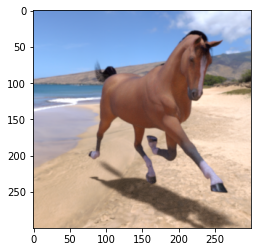

In [ ]:
#horse image
plt.imshow(horse_image_arr)

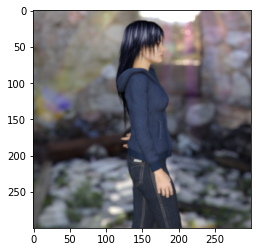

In [ ]:
#human image
plt.imshow(human_image_arr)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(300, 300, 3)),
                                 keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
                                 keras.layers.Conv2D(32, (3,3), (1,1), 'valid', activation='relu'),
                                 keras.layers.MaxPool2D((2,2), 2),
                                 keras.layers.Conv2D(64, (3,3), 1, 'valid', activation='relu'),
                                 keras.layers.MaxPool2D((2,2), 2),
                                 keras.layers.Conv2D(64, (3,3), 1, 'valid', activation='relu'),
                                 keras.layers.MaxPool2D((2,2), 2),
                                 keras.layers.Conv2D(64, (3,3), 1, 'valid', activation='relu'),
                                 keras.layers.MaxPool2D((2,2), 2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(512, 'relu'),
                                 keras.layers.Dense(1, 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalizing the images
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/home/horse_human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.


In [45]:
#training
history = model.fit(train_generator, steps_per_epoch=8,  epochs=15, verbose=1)

Epoch 1/15
8/8 [==============================] - 82s 9s/step - loss: 0.0169 - accuracy: 0.9978
Epoch 2/15
8/8 [==============================] - 74s 9s/step - loss: 0.0033 - accuracy: 1.0000
Epoch 3/15
8/8 [==============================] - 74s 10s/step - loss: 0.1172 - accuracy: 0.9811
Epoch 4/15
8/8 [==============================] - 74s 9s/step - loss: 3.8176 - accuracy: 0.9299
Epoch 5/15
8/8 [==============================] - 74s 9s/step - loss: 0.0090 - accuracy: 1.0000
Epoch 6/15
8/8 [==============================] - 75s 9s/step - loss: 0.0076 - accuracy: 0.9978
Epoch 7/15
8/8 [==============================] - 76s 11s/step - loss: 0.0016 - accuracy: 1.0000
Epoch 8/15
8/8 [==============================] - 76s 11s/step - loss: 7.1663e-04 - accuracy: 1.0000
Epoch 9/15
8/8 [==============================] - 73s 10s/step - loss: 4.6482e-04 - accuracy: 1.0000
Epoch 10/15
8/8 [==============================] - 84s 10s/step - loss: 2.9140e-04 - accuracy: 1.0000
Epoch 11/15
8/8 [=====

In [46]:
horse_test_image = os.path.join('/horse_test.PNG')   #path of the test images
human_test_image = os.path.join('/human_test.PNG')

#image to numpy array for display
horse_test_arr = plt.imread(horse_test_image)
human_test_arr = plt.imread(human_test_image)

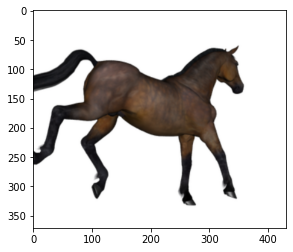

In [47]:
#horse_test image 
plt.imshow(horse_test_arr)

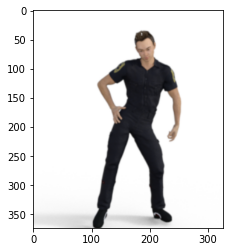

In [48]:
#human_test image
plt.imshow(human_test_arr)

In [49]:
import numpy as np
from keras.preprocessing import image

horse_img = image.load_img(horse_test_image, target_size=(300, 300))
human_img = image.load_img(human_test_image, target_size=(300, 300))

horse_img = image.img_to_array(horse_img)
human_img = image.img_to_array(human_img)

test_horse = np.expand_dims(horse_img, axis = 0)
test_human = np.expand_dims(human_img, axis=0)

test_arr = np.vstack((test_horse, test_human))
#normalizing the test inputs
test_arr = test_arr/255
print(np.shape(test_arr))

(2, 300, 300, 3)


In [52]:
#predictions on test images
#for human (prob > 0.5) and for horse (prob <=0.5)
predictions = model.predict(test_arr)
print(predictions)

[[8.1435864e-08]
 [9.8936486e-01]]
